[1.         1.004004   1.00800801 1.01201201 1.01601602 1.02002002
 1.02402402 1.02802803 1.03203203 1.03603604 1.04004004 1.04404404
 1.04804805 1.05205205 1.05605606 1.06006006 1.06406406 1.06806807
 1.07207207 1.07607608 1.08008008 1.08408408 1.08808809 1.09209209
 1.0960961  1.1001001  1.1041041  1.10810811 1.11211211 1.11611612
 1.12012012 1.12412412 1.12812813 1.13213213 1.13613614 1.14014014
 1.14414414 1.14814815 1.15215215 1.15615616 1.16016016 1.16416416
 1.16816817 1.17217217 1.17617618 1.18018018 1.18418418 1.18818819
 1.19219219 1.1961962  1.2002002  1.2042042  1.20820821 1.21221221
 1.21621622 1.22022022 1.22422422 1.22822823 1.23223223 1.23623624
 1.24024024 1.24424424 1.24824825 1.25225225 1.25625626 1.26026026
 1.26426426 1.26826827 1.27227227 1.27627628 1.28028028 1.28428428
 1.28828829 1.29229229 1.2962963  1.3003003  1.3043043  1.30830831
 1.31231231 1.31631632 1.32032032 1.32432432 1.32832833 1.33233233
 1.33633634 1.34034034 1.34434434 1.34834835 1.35235235 1.3563

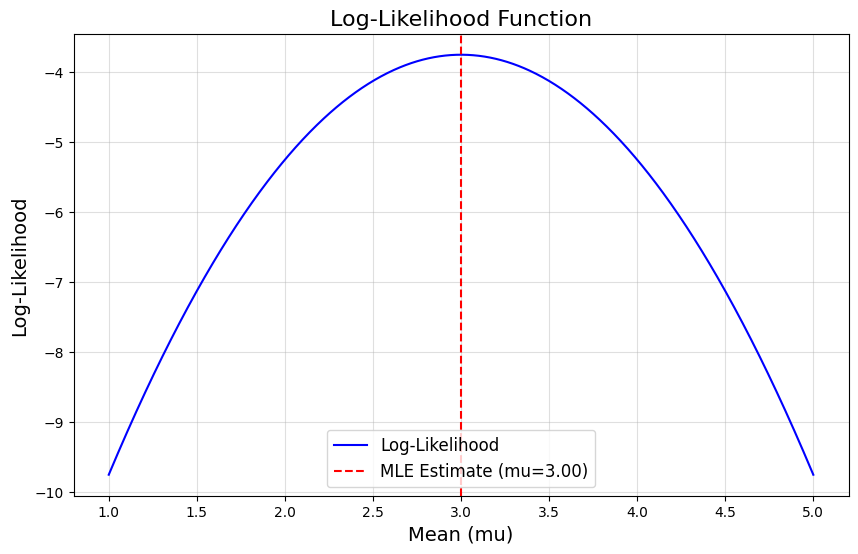

The MLE estimate for the mean (mu) is: 3.00


In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Sample data
data = np.array([2, 3, 4])  # Example dataset with three data points

# Define the log-likelihood function for a normal distribution
# Parameters:
# mu: Mean of the normal distribution (what we want to estimate)
# data: Observed data points
# sigma: Standard deviation of the normal distribution (assumed to be known, default = 1)
def log_likelihood(mu, data, sigma=1):
    n = len(data)  # Number of data points
    # Log-likelihood formula for a normal distribution
    likelihood = -0.5 * n * np.log(2 * np.pi * sigma**2) - (1 / (2 * sigma**2)) * np.sum((data - mu)**2)
    return likelihood

# Generate a range of possible values for the mean (mu)
# This range spans from 1 to 5 with 1000 evenly spaced values
mu_values = np.linspace(1, 5, 1000)
print(mu_values)

# Calculate the log-likelihood for each mu value
# This creates a list of log-likelihood values corresponding to the mu range
likelihood_values = [log_likelihood(mu, data) for mu in mu_values]

# Find the MLE estimate for mu
# The MLE estimate corresponds to the value of mu that maximizes the log-likelihood
mle_mu = mu_values[np.argmax(likelihood_values)]  # np.argmax gives the index of the maximum value

# Plot the log-likelihood function
plt.figure(figsize=(10, 6))  # Set the figure size for better visualization
plt.plot(mu_values, likelihood_values, label='Log-Likelihood', color='blue')  # Plot the log-likelihood curve
plt.axvline(x=mle_mu, color='red', linestyle='--', label=f"MLE Estimate (mu={mle_mu:.2f})")  # Highlight the MLE estimate
plt.title("Log-Likelihood Function", fontsize=16)  # Title of the plot
plt.xlabel("Mean (mu)", fontsize=14)  # Label for the x-axis
plt.ylabel("Log-Likelihood", fontsize=14)  # Label for the y-axis
plt.legend(fontsize=12)  # Add a legend to explain the plot
plt.grid(alpha=0.4)  # Add a grid for better readability
plt.show()  # Display the plot

# Print the MLE estimate for mu
print(f"The MLE estimate for the mean (mu) is: {mle_mu:.2f}")  # Display the value of mu with the highest likelihood

Margin of Error (MoE): 4.16 grams
95% Confidence Interval: [145.84, 154.16] grams


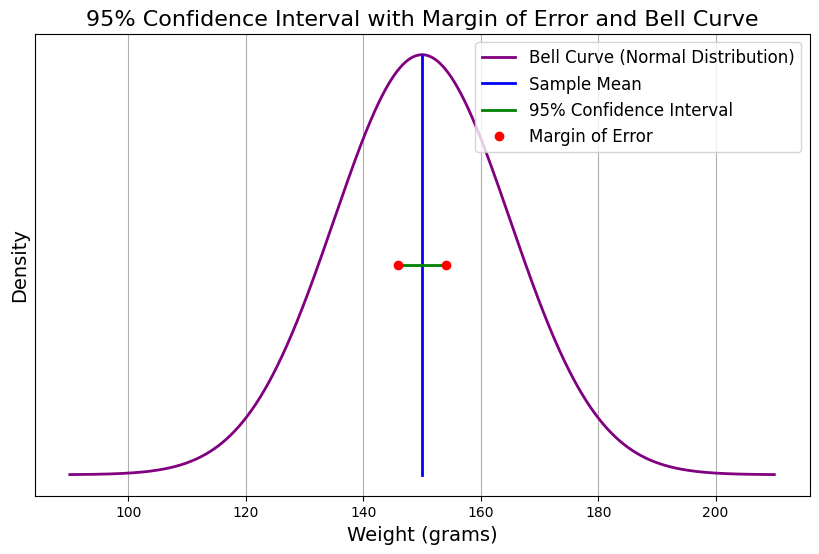

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Given data
sample_mean = 150  # Sample mean (average weight of apples in grams)
sigma = 15  # Population standard deviation (in grams)
n = 50  # Sample size
confidence_level = 0.95  # Confidence level (95%)

# Z-critical value for 95% confidence level
# For a 95% confidence interval, the Z-critical value (Z) is 1.96
# This value corresponds to the 97.5th percentile of the standard normal distribution
Z = 1.96

# Step 1: Calculate the Margin of Error (MoE)
# Formula: MoE = Z * (sigma / sqrt(n))
moe = Z * (sigma / np.sqrt(n))  # Margin of Error (MoE)

# Step 2: Calculate the Confidence Interval (CI)
# The confidence interval is given by:
# CI = [sample_mean - MoE, sample_mean + MoE]
lower_bound = sample_mean - moe  # Lower bound of the CI
upper_bound = sample_mean + moe  # Upper bound of the CI
confidence_interval = [lower_bound, upper_bound]  # Confidence Interval (CI)

# Print the Margin of Error and Confidence Interval
# Displaying the Margin of Error and the Confidence Interval
print(f"Margin of Error (MoE): {moe:.2f} grams")  # Round MoE to 2 decimal places
print(f"95% Confidence Interval: [{lower_bound:.2f}, {upper_bound:.2f}] grams")  # Round CI values to 2 decimal places

# Step 3: Visualize the Confidence Interval with the Margin of Error and Bell Curve
# Create a range of x values for plotting the normal distribution (bell curve)
x = np.linspace(sample_mean - 4 * sigma, sample_mean + 4 * sigma, 1000)  # Range for x-axis (within 4 std deviations)

# Calculate the normal distribution (bell curve) based on the sample mean and population std deviation
y = norm.pdf(x, sample_mean, sigma)  # PDF of the normal distribution

# Plotting the results
plt.figure(figsize=(10, 6))

# Plotting the bell curve (normal distribution)
plt.plot(x, y, label='Bell Curve (Normal Distribution)', color='purple', linewidth=2)

# Plotting the sample mean as a vertical line
plt.plot([sample_mean, sample_mean], [0, max(y)], label='Sample Mean', color='blue', linewidth=2)

# Plotting the confidence interval as a horizontal line
plt.plot(confidence_interval, [max(y)/2, max(y)/2], label='95% Confidence Interval', color='green', linewidth=2)

# Marking the margin of error
plt.plot([sample_mean - moe, sample_mean + moe], [max(y)/2, max(y)/2], 'ro', label='Margin of Error')

# Add labels and title to the plot
plt.title("95% Confidence Interval with Margin of Error and Bell Curve", fontsize=16)
plt.xlabel("Weight (grams)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.yticks([])  # Hide y-axis ticks since it's not relevant for this plot

# Adding a legend to explain the elements of the plot
plt.legend(fontsize=12)  # Show the legend in the plot

# Display the grid to make the plot easier to read
plt.grid(True)  # Turn on the grid for better readability

# Show the plot
plt.show()  # This displays the plot visually